In [1]:
import MDAnalysis
import numpy as np
from DEERPREdict.PRE import PREpredict
from DEERPREdict.DEER import DEERpredict
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# HIV-1 Protease

In [5]:
for sim in ['unbiased','rdc']:
    u = MDAnalysis.Universe('HIV-1PR/sims/{:s}.pdb'.format(sim),'HIV-1PR/sims/{:s}.xtc'.format(sim))
    DEER = DEERpredict(u, residues = [55,55], chains=['A', 'B'], temperature = 300, z_cutoff = 0.05)
    DEER.run(output_prefix='{:s}'.format(sim))

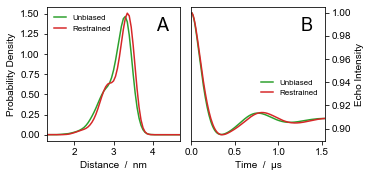

In [6]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for sim,c in zip(['Unbiased','rdc'],[2,3]):
    x, y = np.loadtxt(sim+'-55-55.dat',unpack=True)
    y = y/np.trapz(y,x)
    sim = 'Restrained' if sim=='rdc' else sim
    sim = 'PDB 3BVB' if sim=='3bvb' else sim
    ax1.plot(x,y,ls='-',label=sim.capitalize(),color=plt.cm.tab10(c),lw=1.5)

ax1.set_xlim(1.3,4.7)
ax1.legend(frameon=False, handlelength=1.5)
ax1.set_ylabel('Probability Density')
ax1.set_xlabel('Distance  /  nm')

for sim,c in zip(['Unbiased','rdc'],[2,3]):
    x, y = np.loadtxt(sim+'-55-55_time-domain.dat',unpack=True)
    sim = 'Restrained' if sim=='rdc' else sim
    sim = 'PDB 3BVB' if sim=='3bvb' else sim 
    V = 1+0.0922*(y-1)
    ax2.plot(x,V,ls='-',label=sim,color=plt.cm.tab10(c),lw=1.5)

ax2.set_ylabel('Echo Intensity')
ax2.set_xlabel('Time  /  μs')
ax2.legend(frameon=False, handlelength=1.5,bbox_to_anchor=(0.47,0.28))
ax2.set_xlim(0,1.53)
ax1.annotate('A',xy=(.82,.82),xycoords='axes fraction',fontsize=18)
ax2.annotate('B',xy=(.82,.82),xycoords='axes fraction',fontsize=18)
ax2.yaxis.set_label_position('right')
ax2.yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=.5)

# T4 Lysozyme

Analysis of the PDBs

In [17]:
u = MDAnalysis.Universe('T4L/PDBs/3dmv.pdb')
print(u.trajectory.n_frames,u.trajectory.dt)
for residues in [[89, 109],[109, 140]]:
    DEER = DEERpredict(u, residues = residues, temperature = 298, z_cutoff = 0.05)
    DEER.run(output_prefix = 'T4L/PDBs/3dmv')
u = MDAnalysis.Universe('T4L/PDBs/2lcb.pdb')
for residues in [[89, 109],[109, 140]]:
    DEER = DEERpredict(u, residues = residues, temperature = 298, z_cutoff = 0.05)
    DEER.run(output_prefix = 'T4L/PDBs/2lcb')
u = MDAnalysis.Universe('T4L/PDBs/2lc9.pdb')
for residues in [[89, 109],[109, 140]]:
    DEER = DEERpredict(u, residues = residues, temperature = 298, z_cutoff = 0.05)
    DEER.run(output_prefix = 'T4L/PDBs/2lc9')

/Users/giulio/miniconda3/envs/cg/lib/python3.7/site-packages/MDAnalysis/coordinates/base.py:837: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


1 1.0


Analysis of metadynamics trajectories

In [10]:
bias = np.loadtxt('T4L/sims/MTDbias_single.dat')
u = MDAnalysis.Universe('T4L/sims/MTDsingle.pdb','T4L/sims/MTDsingle.xtc')
print(u.trajectory.n_frames)
for residues in [[89, 109],[109, 140]]:
    DEER = DEERpredict(u, residues = residues, temperature = 298, z_cutoff = 0.05)
    DEER.run(output_prefix = 'T4L/sims/single', weights=np.exp(bias/(.298*8.3145)))

6670


In [9]:
bias = np.loadtxt('T4L/sims/MTDbias_triple.dat')
u = MDAnalysis.Universe('T4L/sims/MTDtriple.pdb','T4L/sims/MTDtriple.xtc')
print(u.trajectory.n_frames)
for residues in [[89, 109],[109, 140]]:
    DEER = DEERpredict(u, residues = residues, temperature = 298, z_cutoff = 0.05)
    DEER.run(output_prefix = 'T4L/sims/triple', weights=np.exp(bias/(.298*8.3145)))

6868


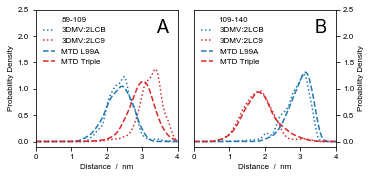

In [11]:
fig, axes = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(5.2,2.5))

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for ax,residues in zip(axes,[[89, 109],[109, 140]]):
    
    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lcb-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.97+yE*.03
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(0),ls=':',label='3DMV:2LCB',lw=1.5)
    
    xG, yG = np.loadtxt('T4L/PDBs/3dmv-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    xE, yE = np.loadtxt('T4L/PDBs/2lc9-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yG*.04+yE*.96
    lc /= np.trapz(lc,xG)
    ax.plot(xG,lc,color=plt.cm.tab10(3),ls=':',label='3DMV:2LC9',lw=1.5)
    
    xS, yS = np.loadtxt('T4L/sims/single-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yS/np.trapz(yS,xS)
    ax.plot(xS,lc,color=plt.cm.tab10(0),ls='--',label=r'MTD L99A',lw=1.5)
    
    xS, yS = np.loadtxt('T4L/sims/triple-{:d}-{:d}.dat'.format(residues[0],residues[1]),unpack=True)
    lc = yS/np.trapz(yS,xS)
    ax.plot(xS,lc,color=plt.cm.tab10(3),ls='--',label=r'MTD Triple',lw=1.5)
    
    ax.set_xlim(0,4)
    ax.set_ylim(-.1,2.5)
    ax.legend(frameon=False,title='{:d}-{:d}'.format(residues[0],residues[1]),
              handlelength=1.5,loc='upper left')
    ax.set_ylabel('Probability Density')
    ax.set_xlabel('Distance  /  nm')
    
axes[0].annotate('A',xy=(.85,.83),xycoords='axes fraction',fontsize=18)
axes[1].annotate('B',xy=(.85,.83),xycoords='axes fraction',fontsize=18)
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.set_ticks_position('right')
plt.tight_layout(w_pad=1.5)

# Acyl-CoA-Binding Protein

In [12]:
u = MDAnalysis.Universe('ACBP/1nti.pdb')
for res in [17,36,46,65,86]:
    PRE = PREpredict(u, res, temperature = 298, Cbeta = False, atom_selection = 'H')
    PRE.run(tau_c = 2e-09, tau_t = 2*1e-10, delay = 1e-2, r_2 = 12.6, wh = 750)

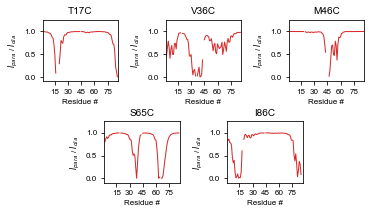

In [14]:
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=plt.figure(figsize=(5.2,3)))
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2)

axes = [ax1,ax2,ax3,ax4,ax5]

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})

for ax,label,res in zip(axes,[17,36,46,65,86],'TVMSI'):
    resnums, calcPREs, _ = np.loadtxt('ACBP/calcPREs/res-{:d}.dat'.format(label),unpack=True)
    ax.plot(resnums, calcPREs, color=plt.cm.tab10(3),lw=1)
    ax.set_ylabel('$I_{para}$ / $I_{dia}$')
    ax.set_ylim(-.1,1.25)
    ax.set_xlim(1,resnums.size+1)
    ax.set_xticks(range(0,resnums.size+1,15)[1:])
    ax.set_xlabel('Residue #')
    ax.set_title(res+str(label)+'C',fontsize=10)
plt.tight_layout(w_pad=1.5,h_pad=0.5)

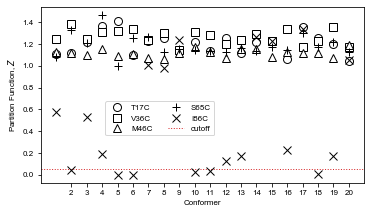

In [16]:
fig = plt.figure(figsize=(5.2,3))
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 8})
for label,res,m in zip([17,36,46,65,86],'TVMSI','os^+x'):
    z = np.loadtxt('ACBP/calcPREs/res-Z-{:d}.data'.format(label))
    plt.plot(range(1,21),z,marker=m,lw=0,color='k',ms=8,mfc='w',label=res+str(label)+'C')
plt.xticks(range(2,21,1),['{:d}'.format(i) for i in range(2,21,1)])
plt.hlines(0.05,0,21,ls=':',lw=1,color=plt.cm.tab10(3),label='cutoff')
plt.legend(ncol=2,loc=(.2,.27))
plt.xlim(0,21)
plt.xlabel('Conformer')
plt.ylabel('Partition Function, $Z$')
plt.tight_layout()